In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
# Удаляем строки без значений
df = df.dropna()

result = df.columns[0]
params = df.columns[1:]

df.head()

,ХСН,САД,КСР,QRS,HCT,PLT,СКФ
0,0,170.0,32,78,29.6,263.0,40.0
1,0,100.0,36,91,38.5,223.0,69.3
2,0,170.0,22,85,35.4,189.0,80.0
3,0,170.0,26,92,37.6,226.0,70.4
4,0,130.0,26,98,42.0,208.0,94.0


In [5]:
requiment = {x: ['mean'] for x in params}
df.groupby('ХСН').agg(requiment)

,САД,КСР,QRS,HCT,PLT,СКФ
,mean,mean,mean,mean,mean,mean
ХСН,,,,,,
0,167.604167,30.270833,97.125000,37.268750,221.916667,73.302083
1,113.108225,45.129870,117.047619,1.726026,215.380087,63.141991


<Axes: xlabel='САД', ylabel='КСР'>

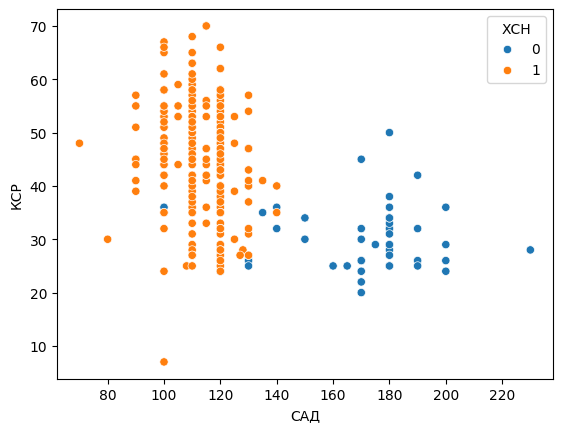

In [9]:
sns.scatterplot(data=df, x="САД", y="КСР", hue="ХСН")

In [12]:
X = df[['САД']]
y = df['КСР']

model = LinearRegression()
model.fit(X, y)

b0 = model.intercept_
b1 = model.coef_[0]

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Коэффициенты линейной регрессии: b0 = {b0}, b1 = {b1}")
print(f"R² = {r2}")

Коэффициенты линейной регрессии: b0 = 68.33899836841469, b1 = -0.21035848607929353
R² = 0.21117731073862456


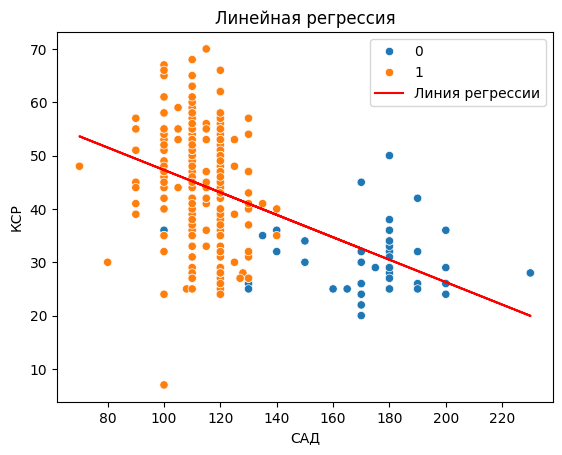

In [14]:
sns.scatterplot(data=df, x="САД", y="КСР", hue="ХСН")

plt.plot(X, y_pred, color='red', label='Линия регрессии')
plt.xlabel('САД')
plt.ylabel('КСР')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

Ill
Коэффициенты линейной регрессии: b0 = 29.934879022711847, b1 = 0.0020044508278224114
R² = 7.648552860117785e-05
Healthy
Коэффициенты линейной регрессии: b0 = 67.32782762185974, b1 = -0.19625414041065528
R² = 0.03593008710990053


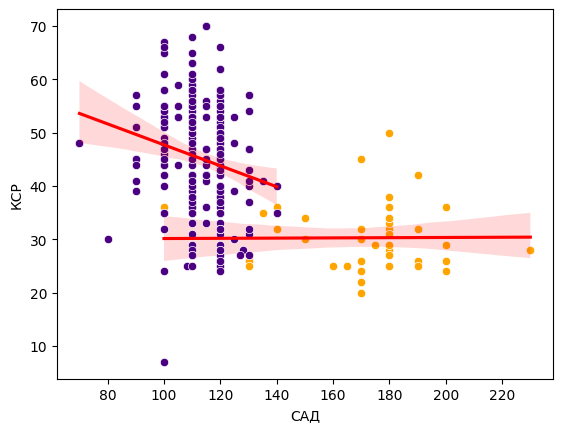

In [18]:
XCH0 = df[df['ХСН'] == 0]
XCH1 = df[df['ХСН'] == 1]

#Ill
X = XCH0[['САД']]
y = XCH0['КСР']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

sns.scatterplot(data=XCH0, x="САД", y="КСР", color='orange')
sns.regplot(data=XCH0, x='САД', y='КСР' , color='red', scatter=False)

b0 = model.intercept_
b1 = model.coef_[0]

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print("Ill")
print(f"Коэффициенты линейной регрессии: b0 = {b0}, b1 = {b1}")
print(f"R² = {r2}")

#Healthy
X = XCH1[['САД']]
y = XCH1['КСР']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

sns.scatterplot(data=XCH1, x="САД", y="КСР", color='indigo')
sns.regplot(data=XCH1, x='САД', y='КСР' , color='red', scatter=False)

b0 = model.intercept_
b1 = model.coef_[0]

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print("Healthy")
print(f"Коэффициенты линейной регрессии: b0 = {b0}, b1 = {b1}")
print(f"R² = {r2}")